In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
p1 = '/content/drive/MyDrive/countries.csv'
p2 = '/content/drive/MyDrive/leagues.csv'
p3 = '/content/drive/MyDrive/teams.csv'
p4 = '/content/drive/MyDrive/matches.csv'
p5 = '/content/drive/MyDrive/player.csv'

In [ ]:
cou = pd.read_csv(p1)
lea = pd.read_csv(p2)
team = pd.read_csv(p3)
mat = pd.read_csv(p4)
ply = pd.read_csv(p5)

In [ ]:
mat.columns #list of all columns

Index(['Unnamed: 0', 'id', 'country_id', 'league_id', 'season', 'stage',
       'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=116)

In [ ]:
#dropping unnecessary columns
mat.drop(mat.columns[[0,5,6]], axis=1, inplace = True)
mat.drop(mat.columns[12:116], axis=1, inplace = True)

In [ ]:
mat.head(10)

,id,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3
0,1,1,1,2008/2009,492473,9987,9993,1,1,NaN,NaN,NaN
1,2,1,1,2008/2009,492474,10000,9994,0,0,NaN,NaN,NaN
2,3,1,1,2008/2009,492475,9984,8635,0,3,NaN,NaN,NaN
3,4,1,1,2008/2009,492476,9991,9998,5,0,NaN,NaN,NaN
4,5,1,1,2008/2009,492477,7947,9985,1,3,NaN,NaN,NaN
5,6,1,1,2008/2009,492478,8203,8342,1,1,NaN,NaN,NaN
6,7,1,1,2008/2009,492479,9999,8571,2,2,NaN,NaN,NaN
7,8,1,1,2008/2009,492480,4049,9996,1,2,NaN,NaN,NaN
8,9,1,1,2008/2009,492481,10001,9986,1,0,NaN,NaN,NaN
9,10,1,1,2008/2009,492564,8342,8571,4,1,NaN,NaN,NaN


In [ ]:
cou.drop(cou[["Unnamed: 0"]],axis = 1, inplace = True)
cou.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [ ]:
lea.drop(lea[["Unnamed: 0"]],axis = 1, inplace = True)
lea.head()

,id,country_id,name,id.1,name.1
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy


In [ ]:
lea.rename(columns = {"name" : "league", 'name.1':'country'}, inplace = True)
lea

,id,country_id,league,id.1,country
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [ ]:
df = pd.merge(left = lea, right = mat , how = 'left', left_on = 'country_id', right_on ='country_id')
df

,id_x,country_id,league,id.1,country,id_y,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3
0,1,1,Belgium Jupiler League,1,Belgium,1,1,2008/2009,492473,9987,9993,1,1,NaN,NaN,NaN
1,1,1,Belgium Jupiler League,1,Belgium,2,1,2008/2009,492474,10000,9994,0,0,NaN,NaN,NaN
2,1,1,Belgium Jupiler League,1,Belgium,3,1,2008/2009,492475,9984,8635,0,3,NaN,NaN,NaN
3,1,1,Belgium Jupiler League,1,Belgium,4,1,2008/2009,492476,9991,9998,5,0,NaN,NaN,NaN
4,1,1,Belgium Jupiler League,1,Belgium,5,1,2008/2009,492477,7947,9985,1,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,Switzerland Super League,24558,Switzerland,25975,24558,2015/2016,1992091,10190,10191,1,0,1.0,2.0,4.0
25975,24558,24558,Switzerland Super League,24558,Switzerland,25976,24558,2015/2016,1992092,9824,10199,1,2,1.0,3.0,5.0
25976,24558,24558,Switzerland Super League,24558,Switzerland,25977,24558,2015/2016,1992093,9956,10179,2,0,1.0,2.0,4.0
25977,24558,24558,Switzerland Super League,24558,Switzerland,25978,24558,2015/2016,1992094,7896,10243,0,0,1.0,2.0,4.0


In [ ]:
df.drop(df[['league_id','id.1']], axis = 1, inplace = True)
df

,id_x,country_id,league,country,id_y,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3
0,1,1,Belgium Jupiler League,Belgium,1,2008/2009,492473,9987,9993,1,1,NaN,NaN,NaN
1,1,1,Belgium Jupiler League,Belgium,2,2008/2009,492474,10000,9994,0,0,NaN,NaN,NaN
2,1,1,Belgium Jupiler League,Belgium,3,2008/2009,492475,9984,8635,0,3,NaN,NaN,NaN
3,1,1,Belgium Jupiler League,Belgium,4,2008/2009,492476,9991,9998,5,0,NaN,NaN,NaN
4,1,1,Belgium Jupiler League,Belgium,5,2008/2009,492477,7947,9985,1,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,Switzerland Super League,Switzerland,25975,2015/2016,1992091,10190,10191,1,0,1.0,2.0,4.0
25975,24558,24558,Switzerland Super League,Switzerland,25976,2015/2016,1992092,9824,10199,1,2,1.0,3.0,5.0
25976,24558,24558,Switzerland Super League,Switzerland,25977,2015/2016,1992093,9956,10179,2,0,1.0,2.0,4.0
25977,24558,24558,Switzerland Super League,Switzerland,25978,2015/2016,1992094,7896,10243,0,0,1.0,2.0,4.0


In [ ]:
df.drop(df[["country_id"]],axis =1, inplace = True)

In [ ]:
team_att = pd.read_csv('/content/drive/MyDrive/team_attributes.csv')
team_att

,Unnamed: 0,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [ ]:
team

,Unnamed: 0,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,0,1,9987,673.0,KRC Genk,GEN
1,1,2,9993,675.0,Beerschot AC,BAC
2,2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,3,4,9994,2007.0,Sporting Lokeren,LOK
4,4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...,...
294,294,49479,10190,898.0,FC St. Gallen,GAL
295,295,49837,10191,1715.0,FC Thun,THU
296,296,50201,9777,324.0,Servette FC,SER
297,297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [ ]:
team_att.drop(team_att[["id","team_fifa_api_id"]],axis =1, inplace = True)
team.drop(team[["id","team_fifa_api_id"]],axis = 1, inplace= True)

In [ ]:
df_1 = pd.merge(left = team, right = team_att, how = "left", left_on = "team_api_id", right_on = "team_api_id")

In [ ]:
df_1

,Unnamed: 0_x,team_api_id,team_long_name,team_short_name,Unnamed: 0_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,0,9987,KRC Genk,GEN,484.0,2010-02-22 00:00:00,45.0,Balanced,NaN,Little,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover
1,0,9987,KRC Genk,GEN,485.0,2011-02-22 00:00:00,66.0,Balanced,NaN,Little,...,51.0,Normal,Organised,48.0,Medium,47.0,Press,54.0,Normal,Offside Trap
2,0,9987,KRC Genk,GEN,486.0,2012-02-22 00:00:00,53.0,Balanced,NaN,Little,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
3,0,9987,KRC Genk,GEN,487.0,2013-09-20 00:00:00,58.0,Balanced,NaN,Little,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
4,0,9987,KRC Genk,GEN,488.0,2014-09-19 00:00:00,58.0,Balanced,52.0,Normal,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,297,7730,FC Lausanne-Sports,LAU,671.0,2010-02-22 00:00:00,30.0,Slow,NaN,Little,...,60.0,Normal,Organised,55.0,Medium,60.0,Press,50.0,Normal,Cover
1465,297,7730,FC Lausanne-Sports,LAU,672.0,2012-02-22 00:00:00,37.0,Balanced,NaN,Little,...,48.0,Normal,Organised,43.0,Medium,43.0,Press,55.0,Normal,Cover
1466,297,7730,FC Lausanne-Sports,LAU,673.0,2013-09-20 00:00:00,51.0,Balanced,NaN,Little,...,48.0,Normal,Organised,43.0,Medium,43.0,Press,55.0,Normal,Cover
1467,297,7730,FC Lausanne-Sports,LAU,674.0,2014-09-19 00:00:00,37.0,Balanced,55.0,Normal,...,52.0,Normal,Organised,46.0,Medium,44.0,Press,55.0,Normal,Cover


In [ ]:
df_1.drop(df_1[["team_long_name","date"]], axis = 1, inplace = True)
df_1

,Unnamed: 0_x,team_api_id,team_short_name,Unnamed: 0_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,0,9987,GEN,484.0,45.0,Balanced,NaN,Little,45.0,Mixed,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover
1,0,9987,GEN,485.0,66.0,Balanced,NaN,Little,52.0,Mixed,...,51.0,Normal,Organised,48.0,Medium,47.0,Press,54.0,Normal,Offside Trap
2,0,9987,GEN,486.0,53.0,Balanced,NaN,Little,55.0,Mixed,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
3,0,9987,GEN,487.0,58.0,Balanced,NaN,Little,38.0,Mixed,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
4,0,9987,GEN,488.0,58.0,Balanced,52.0,Normal,38.0,Mixed,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,297,7730,LAU,671.0,30.0,Slow,NaN,Little,60.0,Mixed,...,60.0,Normal,Organised,55.0,Medium,60.0,Press,50.0,Normal,Cover
1465,297,7730,LAU,672.0,37.0,Balanced,NaN,Little,49.0,Mixed,...,48.0,Normal,Organised,43.0,Medium,43.0,Press,55.0,Normal,Cover
1466,297,7730,LAU,673.0,51.0,Balanced,NaN,Little,49.0,Mixed,...,48.0,Normal,Organised,43.0,Medium,43.0,Press,55.0,Normal,Cover
1467,297,7730,LAU,674.0,37.0,Balanced,55.0,Normal,49.0,Mixed,...,52.0,Normal,Organised,46.0,Medium,44.0,Press,55.0,Normal,Cover


In [ ]:
df_1.drop(df_1[['buildUpPlayDribbling']], axis = 1, inplace = True)

In [ ]:
df = pd.merge(left = df, right = df_1, how = 'left', left_on = 'home_team_api_id', right_on = "team_api_id")
df.head(10)

,id_x,league,country,id_y,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,Belgium Jupiler League,Belgium,1,2008/2009,492473,9987,9993,1,1,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover
1,1,Belgium Jupiler League,Belgium,1,2008/2009,492473,9987,9993,1,1,...,51.0,Normal,Organised,48.0,Medium,47.0,Press,54.0,Normal,Offside Trap
2,1,Belgium Jupiler League,Belgium,1,2008/2009,492473,9987,9993,1,1,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
3,1,Belgium Jupiler League,Belgium,1,2008/2009,492473,9987,9993,1,1,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
4,1,Belgium Jupiler League,Belgium,1,2008/2009,492473,9987,9993,1,1,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
5,1,Belgium Jupiler League,Belgium,1,2008/2009,492473,9987,9993,1,1,...,56.0,Normal,Organised,36.0,Medium,57.0,Press,70.0,Wide,Cover
6,1,Belgium Jupiler League,Belgium,2,2008/2009,492474,10000,9994,0,0,...,50.0,Normal,Organised,70.0,High,60.0,Press,70.0,Wide,Cover
7,1,Belgium Jupiler League,Belgium,2,2008/2009,492474,10000,9994,0,0,...,53.0,Normal,Organised,46.0,Medium,48.0,Press,53.0,Normal,Cover
8,1,Belgium Jupiler League,Belgium,2,2008/2009,492474,10000,9994,0,0,...,50.0,Normal,Organised,44.0,Medium,55.0,Press,53.0,Normal,Cover
9,1,Belgium Jupiler League,Belgium,2,2008/2009,492474,10000,9994,0,0,...,32.0,Little,Organised,44.0,Medium,58.0,Press,37.0,Normal,Cover


In [ ]:
df = df.loc[df['country'].isin(df["country"].value_counts().index.tolist()[:5])]

In [ ]:
df_goals = df.groupby("country")
df_goals.mean()

,id_x,id_y,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,...,team_api_id,Unnamed: 0_y,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
country,,,,,,,,,,,,,,,,,,,,,
England,1729.0,3248.500000,1.178767e+06,9142.275000,9142.275000,1.550987,1.159539,1.000000,2.030263,4.029934,...,9142.275000,790.706250,56.271875,52.368750,50.980208,56.805208,52.204167,45.041667,49.944792,51.048958
France,4769.0,6286.715915,1.169834e+06,9879.933911,9830.500428,1.413355,1.030051,1.000000,2.038091,4.056395,...,9879.933911,801.854821,53.267606,48.291441,51.323944,54.499458,53.404117,46.835320,49.071506,52.771398
Germany,7809.0,9030.143292,1.187018e+06,9184.736780,9179.564526,1.636414,1.271031,1.000000,2.028617,4.034008,...,9184.736780,634.944771,56.969448,47.350176,55.119859,52.627497,54.893067,50.669800,51.507638,51.367803
Italy,10257.0,11759.691751,1.233176e+06,9512.414230,10331.056268,1.510803,1.105296,1.000342,2.283051,4.174106,...,9512.414230,669.830340,55.732968,44.946639,53.679380,52.946183,57.009578,42.794310,51.100507,50.701043
Spain,21518.0,23032.637807,1.211601e+06,9040.616205,9031.444114,1.642352,1.131242,1.000000,2.013635,4.012962,...,9040.616205,745.479744,47.052239,44.796375,53.848614,54.672708,55.557569,48.864606,49.121535,55.990405


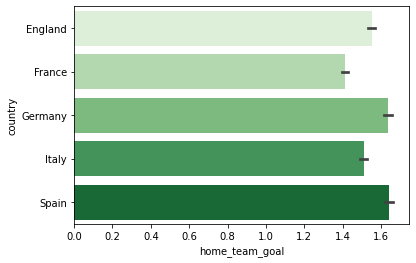

In [ ]:
sns.barplot(x = "home_team_goal", y = 'country', data = df, palette = "Greens")

In [ ]:
p_att = pd.read_csv('/content/drive/MyDrive/player_attributes.csv')
p_att.head(10)

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [48]:
p_att.columns

Index(['Unnamed: 0', 'id', 'player_fifa_api_id', 'player_api_id',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [ ]:
p_att.drop(p_att[["date"]],axis = 1,inplace =True)

q. does preferred foot choice affect attacking work rate

In [ ]:
p_att["attacking_work_rate"].unique()

array(['medium', 'high', nan, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

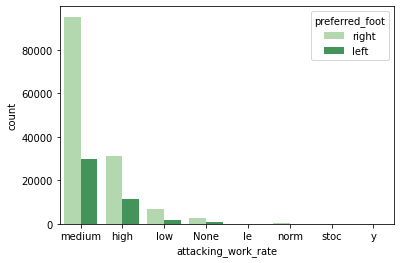

In [ ]:
sns.countplot(data = p_att, x= "attacking_work_rate", hue = "preferred_foot", palette = "Greens") #effect of preferred foot actionon attacking work rate

q. does vision affect overall rating

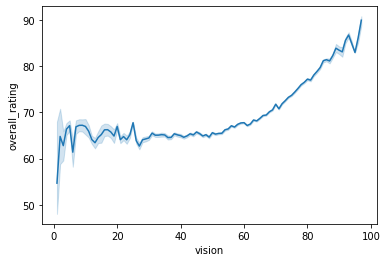

In [ ]:
grp = p_att.groupby("defensive_work_rate").mean()
sns.lineplot(data =  p_att,x = "vision", y = "overall_rating")

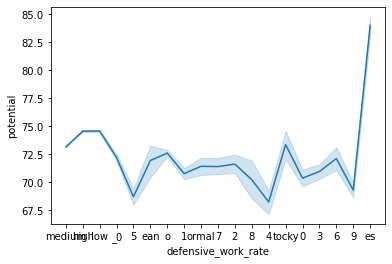

In [ ]:
#sns.lineplot(data = p_att, y ='potential', x = 'defensive_work_rate')

q. does defensive work rate increase with increase in potential

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:154: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f8ae6bb27c0> has a label of '_0' which cannot be automatically added to the legend.
  ax_obj.legend(handles, labels, title=self.variables["hue"], **legend_kws)


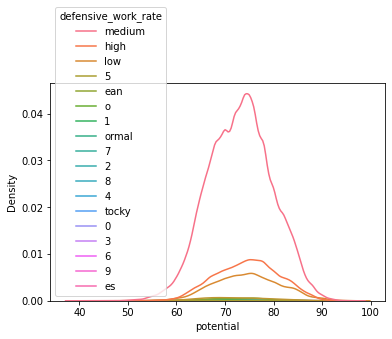

In [ ]:
sns.kdeplot( data = p_att, x= "potential", hue = "defensive_work_rate")

Q. how is goalkeeper's position related to attacking work rate

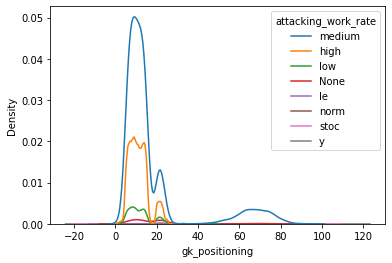

In [ ]:
sns.kdeplot( data = p_att, x= "gk_positioning", hue = "attacking_work_rate") 